In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


# Load the CSV files
weather_df = pd.read_csv("weather_2023_2024.csv", parse_dates=["date"])
sales_df = pd.read_csv("retail_sales_2023_2024.csv", parse_dates=["date"])

# Merge the dataframes on the 'date' column
merged_df = pd.merge(sales_df, weather_df, on="date", how="inner")

# Set the date column as the index for resampling
merged_df.set_index("date", inplace=True)


In [ ]:

# Weekly aggregation
weekly_df = merged_df.resample("W").agg({
    "quantity_sold": "sum",
    "revenue": "sum",
    "temperature": "mean",
    "humidity": "mean",
    "wind_speed": "mean"
})
weekly_df.reset_index("date", inplace=True)
# Monthly aggregation
monthly_df = merged_df.resample("ME").agg({
    "quantity_sold": "sum",
    "revenue": "sum",
    "temperature": "mean",
    "humidity": "mean",
    "wind_speed": "mean"
})
monthly_df.reset_index("date", inplace=True)

# Weekly aggregation
weekly_df_pc = merged_df.groupby("product_id").resample("W").agg({
    "quantity_sold": "sum",
    "revenue": "sum",
    "temperature": "mean",
    "humidity": "mean",
    "wind_speed": "mean"
})
weekly_df_pc.reset_index(["date","product_id"], inplace=True)

weekly_df_store = merged_df.groupby("store_id").resample("W").agg({
    "quantity_sold": "sum",
    "revenue": "sum",
    "temperature": "mean",
    "humidity": "mean",
    "wind_speed": "mean"
})
weekly_df_store.reset_index(["date","store_id"], inplace=True)

# Monthly aggregation
monthly_df_pc= merged_df.groupby("product_id").resample("ME").agg({
    "quantity_sold": "sum",
    "revenue": "sum",
    "temperature": "mean",
    "humidity": "mean",
    "wind_speed": "mean"
})
monthly_df_pc.reset_index(["date","product_id"], inplace=True)

monthly_df_store= merged_df.groupby("store_id").resample("ME").agg({
    "quantity_sold": "sum",
    "revenue": "sum",
    "temperature": "mean",
    "humidity": "mean",
    "wind_speed": "mean"
})
monthly_df_store.reset_index(["date","store_id"], inplace=True)

overview_pc_df = merged_df.groupby("product_id").agg({
    "quantity_sold": "sum",
    "revenue": "sum"
})
overview_pc_df.reset_index("product_id", inplace=True)
overview_store_df = merged_df.groupby("store_id").agg({
    "quantity_sold": "sum",
    "revenue": "sum"
})
overview_store_df.reset_index("store_id", inplace=True)

overview_df = merged_df.agg({
    "quantity_sold": "sum",
    "revenue": "sum",
    "temperature": "mean",
    "humidity": "mean",
    "wind_speed": "mean"
})

# Save the aggregated dataframes as Parquet files
path = "../gold/"
weekly_df.to_parquet(path + "aggregated_weekly.parquet")
monthly_df.to_parquet(path + "aggregated_monthly.parquet")
weekly_df_pc.to_parquet(path + "aggregated_weekly_pc.parquet")
monthly_df_pc.to_parquet(path + "aggregated_monthly_pc.parquet")

weekly_df_store.to_parquet(path + "aggregated_weekly_stores.parquet")
monthly_df_store.to_parquet(path + "aggregated_monthly_stores.parquet")


overview_pc_df.to_parquet(path + "aggregated_pc.parquet")
overview_store_df.to_parquet(path + "aggregated_store.parquet")
overview_df.to_frame().to_parquet(path + "aggregated_overall.parquet")


In [10]:
df = pd.DataFrame(overview_df)
pd.Series(df[0])["temperature"]

np.float64(11.78016415868673)

In [ ]:
weekly_df_store[["revenue", "store_id"]].corr()["revenue"][1]

revenue     1.000000
store_id    0.000788
Name: revenue, dtype: float64

In [39]:
weekly_df.columns

Index(['date', 'quantity_sold', 'revenue', 'temperature', 'humidity',
       'wind_speed'],
      dtype='object')

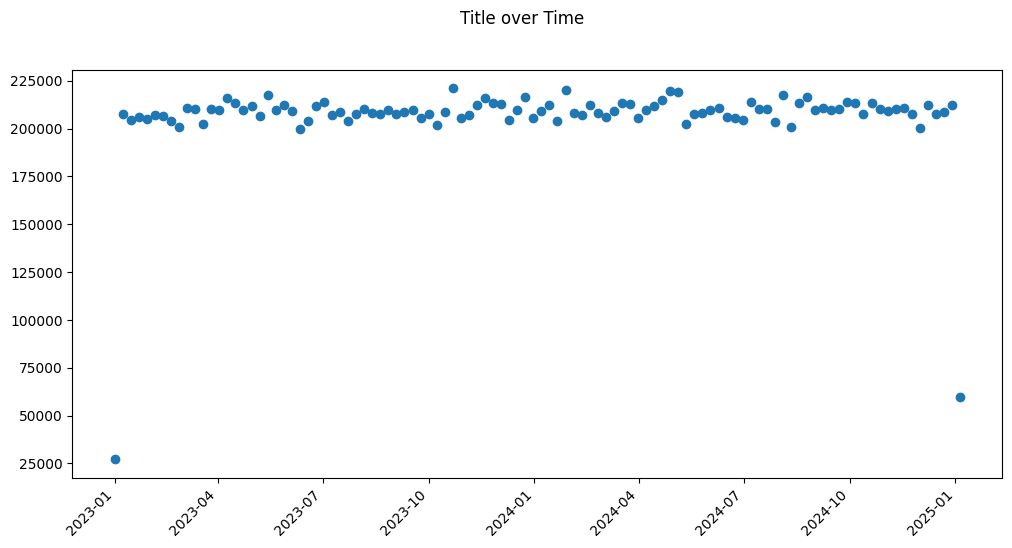

In [21]:
def create_plot(df, target_var, labels:dict = {"x": "Date", "y": "Target", "title": "Title"}): 
    fig, ax = plt.subplots(figsize=(12,6))

    ax.scatter(df.index, df[target_var], marker = "o", linewidths=1)
    # ax.lines(df.index, df[target_var], color = "blue")
    fig.autofmt_xdate(rotation=45)
    fig.suptitle(f"{labels["title"]} over Time")
    plt.show()

create_plot(df = weekly_df, target_var="revenue")